In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error


/home/supriti/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data_train = pd.read_excel('Data_Train.xlsx')

In [3]:
data_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [5]:
data_train.head(35)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [6]:
brand_name=[]
model_name=[]
for index, rows in data_train.iterrows():
    brand_name.append(rows['Name'].split()[0].lower())
    model_name.append(rows['Name'].split()[1].lower())

In [7]:
data_train['Brand']= brand_name

Text(0, 0.5, 'Number of cars')

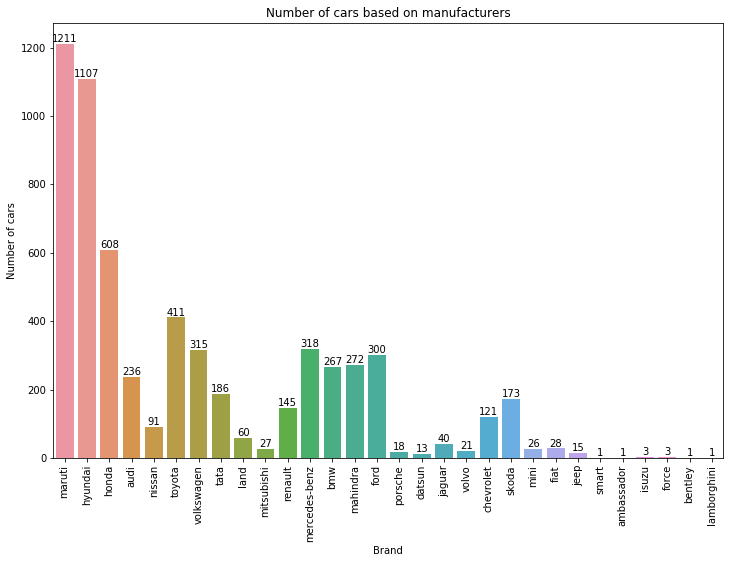

In [8]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Brand', data = data_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Number of cars based on manufacturers")
plt.xlabel("Brand")
plt.ylabel("Number of cars")

In [9]:
data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
dtype: int64

In [10]:
data_train[data_train['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,toyota


In [11]:
mileage_train = data_train["Mileage"].str.split(" ", expand = True)
data_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')

data_train["Mileage"].fillna(data_train["Mileage"].astype("float64").mean(), inplace = True)

In [12]:
data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
dtype: int64

In [13]:
Engine_train = data_train["Engine"].str.split(" ", expand = True)
data_train["Engine"] = pd.to_numeric(Engine_train[0], errors = 'coerce')
data_train["Engine"].fillna(data_train["Engine"].astype("float64").mean(), inplace = True)

In [14]:
data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                42
Price                 0
Brand                 0
dtype: int64

In [15]:
Power_train = data_train["Power"].str.split(" ", expand = True)
data_train["Power"] = pd.to_numeric(Power_train[0], errors = 'coerce')
data_train["Power"].fillna(data_train["Power"].astype("float64").mean(), inplace = True)

In [16]:
data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                42
Price                 0
Brand                 0
dtype: int64

In [17]:
data_train["Seats"].fillna(data_train["Seats"].astype("float64").mean(), inplace = True)

In [18]:
data_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64

# Data Splitting

In [19]:
data_train_target = data_train['Price']
data_train_final = data_train.drop(['Name','Price','Location','Transmission','Fuel_Type','Owner_Type','Brand','Year'],axis =1)
data_train_final.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats
0,72000,26.60,998.0,58.16,5.0
1,41000,19.67,1582.0,126.20,5.0
2,46000,18.20,1199.0,88.70,5.0
3,87000,20.77,1248.0,88.76,7.0
4,40670,15.20,1968.0,140.80,5.0


In [20]:
from sklearn.preprocessing import MinMaxScaler
for i in ['Kilometers_Driven','Mileage','Engine','Power']:
    data_train_final[i] = MinMaxScaler(feature_range=(0,1)).fit_transform(data_train_final[i].values.astype(float).reshape(-1,1))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_train_final, data_train_target, test_size = 0.33)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4032 entries, 5578 to 3814
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  4032 non-null   float64
 1   Mileage            4032 non-null   float64
 2   Engine             4032 non-null   float64
 3   Power              4032 non-null   float64
 4   Seats              4032 non-null   float64
dtypes: float64(5)
memory usage: 189.0 KB


## Skipping EDA ...

# Model 1: Decision Tree Regressor

In [23]:
from sklearn.metrics import mean_squared_error

D_T = tree.DecisionTreeRegressor(max_depth=3)
D_T.fit(X_train, y_train)
y_pred_dt = D_T.predict(X_test)
print('The Score on the test set with a basic decision tree regressor is:',D_T.score(X_test,y_test))
print("The Root Mean squared error with a basic decision tree regressor: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_dt)))

The Score on the test set with a basic decision tree regressor is: 0.6906816378441051
The Root Mean squared error with a basic decision tree regressor: 6.45


In [24]:
trknn_scores=[]
teknn_scores= []
rmse_scores=[]
for i in np.arange(1,20,1):
    D_T = tree.DecisionTreeRegressor(max_depth=i,random_state=42)
    D_T.fit(X_train, y_train)
    y_pred_dt = D_T.predict(X_test)
    train_scores = D_T.score(X_train,y_train)
    test_scores = D_T.score(X_test,y_test)
    # The Root mean squared error
    trknn_scores.append(train_scores)
    teknn_scores.append(test_scores)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_dt)))

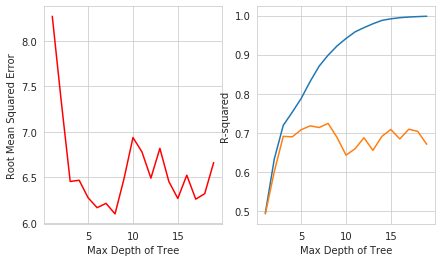

In [25]:
sns.set_style('whitegrid')
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(7,4));
ax1.plot(np.arange(1,20,1),rmse_scores,color='red');
ax2.plot(np.arange(1,20,1),trknn_scores);
ax2.plot(np.arange(1,20,1),teknn_scores);
ax1.set_xlabel('Max Depth of Tree')
ax2.set_xlabel('Max Depth of Tree')
ax1.set_ylabel('Root Mean Squared Error')
ax2.set_ylabel('R-squared');

In [26]:
from sklearn import tree
from sklearn.metrics import mean_squared_error

D_T = tree.DecisionTreeRegressor(max_depth=8,random_state=42)
D_T.fit(X_train, y_train)
y_pred_dt = D_T.predict(X_test)
print('The Score on the training set with a decision tree regressor is:',D_T.score(X_train,y_train))
print('The Score on the test set with a decision tree regressor is:',D_T.score(X_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_dt)))

The Score on the training set with a decision tree regressor is: 0.8985571468281915
The Score on the test set with a decision tree regressor is: 0.7238989894861845
Mean squared error: 6.10


# Model 2: Linear Regression

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_pred_linear = lreg.predict(X_test)
print('The Score on the test set with a linear regression is:', lreg.score(X_test,y_test))
# The Root mean squared error
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_linear)))

The Score on the test set with a linear regression is: -0.02895618652046661
Mean squared error: 11.77


# Model 3: KNN Model

In [30]:
KNR = KNeighborsRegressor()


trknn_scores=[]
teknn_scores= []
rmse_scores=[]

for i in np.arange(1,100,5):
    KNR = KNeighborsRegressor(n_neighbors=i)
    KNR.fit(X_train,y_train)
    KNR.score(X_test,y_test)
    train_scores = KNR.score(X_train,y_train)
    test_scores = KNR.score(X_test,y_test)
    
# The Root mean squared error
    
    trknn_scores.append(train_scores)
    teknn_scores.append(test_scores)
    y_pred_knn = KNR.predict(X_test)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_knn)))

Text(0, 0.5, 'R-squared')

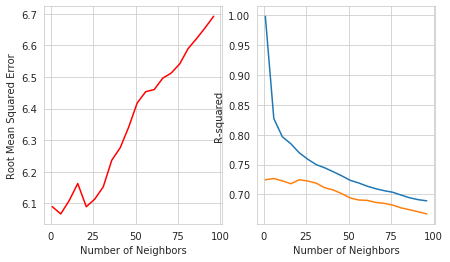

In [31]:
sns.set_style('whitegrid')
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(7,4))
ax1.plot(np.arange(1,100,5),rmse_scores,color='red')
ax2.plot(np.arange(1,100,5),trknn_scores)
ax2.plot(np.arange(1,100,5),teknn_scores)
ax1.set_xlabel('Number of Neighbors')
ax2.set_xlabel('Number of Neighbors')
ax1.set_ylabel('Root Mean Squared Error')
ax2.set_ylabel('R-squared')

In [32]:
KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(X_train,y_train)
y_pred_KNR = KNR.predict(X_test)
print('The Score on the test set with a KNN regressor is:',KNR.score(X_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_KNR)))

The Score on the test set with a KNN regressor is: 0.7217196674274282
Mean squared error: 6.12


# Model 4: Random Forest Regressor Model

In [33]:
from sklearn.ensemble import RandomForestRegressor

rand_est = RandomForestRegressor()
rand_est.fit(X_train,y_train)
y_pred = rand_est.predict(X_test)
print(' The Score on the test set with a random forest regressor is:', rand_est.score(X_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))

 The Score on the test set with a random forest regressor is: 0.7992933825212152
Mean squared error: 5.20


In [38]:
RFR = RandomForestRegressor()

n_estimators = [1 , 2 , 4, 8 , 16, 32, 64, 100, 200]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

best_model = rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   30.8s finished


In [39]:
best_model

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [40]:
best_model.best_params_

{'n_estimators': 64,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [41]:
from sklearn.ensemble import RandomForestRegressor

rand_est = RandomForestRegressor(max_depth=None, n_estimators= 64, min_samples_split= 5, min_samples_leaf= 1, bootstrap= True, max_features= 'sqrt')
rand_est.fit(X_train,y_train)
y_pred_rfr = rand_est.predict(X_test)
print(' The Score on the train set with a hyperparameter optimized random forest regressor is:',rand_est.score(X_train,y_train))
print(' The Score on the test set with a hyperparameter optimized random forest regressor is:',rand_est.score(X_test,y_test))
print("Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

 The Score on the train set with a hyperparameter optimized random forest regressor is: 0.9398451642420426
 The Score on the test set with a hyperparameter optimized random forest regressor is: 0.814841571676949
Mean squared error: 4.99
